# Load Data

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
dfs = pd.read_json('MLA_100k_checked_v3.jsonlines', lines=True)

In [2]:
dfs = dfs.rename(columns = {'tags':'tag'})
dfs = dfs.rename(columns = {'id':'Id'})

## Get features from dictionary columns

In [3]:
# Get region
dfs['seller_country'] = dfs.apply(lambda x : x['seller_address']['country']['name'], axis = 1)
dfs['seller_state'] = dfs.apply(lambda x : x['seller_address']['state']['name'], axis = 1)
dfs['seller_city'] = dfs.apply(lambda x : x['seller_address']['city']['name'], axis = 1)

In [4]:
# Transform id (named as descriptions) column to get data
import ast
def str_to_dict(column):
    for i in range(len(column)):
        try:
            column[i] = ast.literal_eval(column[i][0])
        except:
            return

str_to_dict(dfs['descriptions'])

In [5]:
# get data from descriptions and shipping 
dfs = pd.concat([dfs, dfs["descriptions"].apply(pd.Series)], axis=1)
dfs = pd.concat([dfs, dfs["shipping"].apply(pd.Series)], axis=1)

In [6]:
pd.set_option('display.max_columns', None)
dfs.head(5)

,seller_address,warranty,sub_status,condition,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,site_id,listing_type_id,price,attributes,buying_mode,tag,listing_source,parent_item_id,coverage_areas,category_id,descriptions,last_updated,international_delivery_mode,pictures,Id,official_store_id,differential_pricing,accepts_mercadopago,original_price,currency_id,thumbnail,title,automatic_relist,date_created,secure_thumbnail,stop_time,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,sold_quantity,available_quantity,seller_country,seller_state,seller_city,0,id,local_pick_up,methods,tags,free_shipping,mode,dimensions,free_methods
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],MLA,bronze,80.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6553902747,[],MLA126406,{'id': 'MLA4695330653-912855983'},2015-09-05T20:42:58.000Z,none,"[{'size': '500x375', 'secure_url': 'https://a2...",MLA4695330653,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/5386-MLA469533065...,Auriculares Samsung Originales Manos Libres Ca...,False,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-04 20:42:53,active,None,NaN,NaN,1,2015-09-05 20:42:53,http://articulo.mercadolibre.com.ar/MLA4695330...,0,1,Argentina,Capital Federal,San Cristóbal,NaN,MLA4695330653-912855983,True,[],[],False,not_specified,None,NaN
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,[],used,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],MLA,silver,2650.0,[],buy_it_now,[],,MLA7727150374,[],MLA10267,{'id': 'MLA7160447179-930764806'},2015-09-26T18:08:34.000Z,none,"[{'size': '499x334', 'secure_url': 'https://a2...",MLA7160447179,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/23223-MLA71604471...,Cuchillo Daga Acero Carbón Casco Yelmo Solinge...,False,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-25 18:08:30,active,None,NaN,NaN,1,2015-09-26 18:08:30,http://articulo.mercadolibre.com.ar/MLA7160447...,0,1,Argentina,Capital Federal,Buenos Aires,NaN,MLA7160447179-930764806,True,[],[],False,me2,None,NaN
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],used,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],MLA,bronze,60.0,[],buy_it_now,[dragged_bids_and_visits],,MLA6561247998,[],MLA1227,{'id': 'MLA7367189936-916478256'},2015-09-09T23:57:10.000Z,none,"[{'size': '375x500', 'secure_url': 'https://a2...",MLA7367189936,NaN,NaN,True,NaN,ARS,http://mla-s1-p.mlstatic.com/22076-MLA73671899...,"Antigua Revista Billiken, N° 1826, Año 1954",False,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,2015-11-08 23:57:07,active,None,NaN,NaN,1,2015-09-09 23:57:07,http://articulo.mercadolibre.com.ar/MLA7367189...,0,1,Argentina,Capital Federal,Boedo,NaN,MLA7367189936-916478256,True,[],[],False,me2,None,NaN
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",None,[],new,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],MLA,silver,580.0,[],buy_it_now,[],,None,[],MLA86345,{'id': 'MLA9191625553-932309698'},2015-10-05T16:03:50.306Z,none,"[{'size': '441x423', 'secure_url': 'https://a2...",MLA9191625553,NaN,NaN,True,NaN,ARS,http://mla-s2-p.mlstatic.com/183901-MLA9191625...,Alarma Guardtex Gx412 Seguridad Para El Automo...,False,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,2015-12-04 01:13:16,active,None,NaN,NaN,1,2015-09-28 18:47:56,http://articulo.mercadolibre.com.ar/MLA9191625...,0,1,Argentina,Capital Federal,Floresta,NaN,MLA9191625553-932309698,True,[],[],False,me2,None,NaN
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI RE

In [7]:
# Get payment methods from dict
def convertCol(x,key,i):
    try:
        return x[i][key]
    except: 
        return ''
    
for key in ['description']: #['description','id','type'] -- only description is interesting
    for i in range(0,13):
        dfs[f'payment_{key}{i}'] = dfs['non_mercado_pago_payment_methods'].apply(lambda x: convertCol(x,key,i))

In [8]:
# Create a boolean column for each payment method 
lista_c = []
for i in range(0,13):
    lista = dfs[f'payment_description{i}'].unique()
    lista_c.extend(lista)

desc_uniques = set(lista_c)
desc_uniques.remove('')
desc_uniques

{'Acordar con el comprador',
 'American Express',
 'Cheque certificado',
 'Contra reembolso',
 'Diners',
 'Efectivo',
 'Giro postal',
 'MasterCard',
 'Mastercard Maestro',
 'MercadoPago',
 'Tarjeta de crédito',
 'Transferencia bancaria',
 'Visa',
 'Visa Electron'}

In [9]:
# Rename column for an improved dataframe (#TODO: Use apply for performance)
for col in desc_uniques:
    col_name=col.replace(' ','_')
    dfs[col_name] = dfs.isin([col]).any(axis=1)

# drop older columns
dfs = dfs.drop(dfs.loc[:, 'payment_description0':'payment_description12'], axis = 1)

In [10]:
import numpy as np
dfs = dfs.applymap(lambda x: x if x else np.nan)
dfs = dfs.dropna(how='all', axis=1)

# Data Transformation

## Change type and filter columns

COLUNAS QUE FICAM:
- warranty fica
- sub_status fica, quando suspende anúncio, pode ter a ver
- base_price fica
- seller_id fica
- price fica
- buying_mode fica
- parent_item_id fica
- last_updated fica
- id fica
- official_store_id fica
- accepts_mercadopago fica (duplicado com mercado pago?)
- original_price fica
- currency_id fica
- title fica
- automatic_relist fica
- stop_time fica
- status fica
- video_id fica (pode ser vídeo de usados)
- initial_quantity definitivamente fica
- start_time fica
- sold_quantity fica
- available_quantity fica
- seller_country, state, city fica
- local_pick_up fica
- free_shipping fica (provavelmente usados usam menos, venda privada)
- Contra_reembolso fica (usados precisam de reembolso)
- Giro_postal fica
- mode fica (não sei o que é, mas tá completa, not_specified pode ser mais comum em usados)
- tags fica
- date_created

FICA MAS TRANFORMAR (pagamentos):
- Cheque_certificado
- Mastercard_Maestro
- Diners
- Transferencia_bancaria
- MercadoPago (será? duplicado com accepts mercadopago?)
- Efectivo
- Tarjeta_de_crédito (duplicado com outras colunas? mesclar colunas e preencher essa)
- American_Express
- MasterCard
- Visa_Electron
- Visa
- Acordar_con_el_comprador

COLUNAS QUE SAIEM:
- seller_address sai
- deals_ids sai, não parece dizer nada relevante para nós
- shipping sai
- non_mercad_pago_etc (transformei) sai
- site_id sai
- listin_type_id sai
- category sai
- description sai (virou id)
- international_delivery_mode
- pictures sai
- thumbnail sai
- secure_thumbnail sai
- permalink sai
- free_methods sai, não parece ter info relevante


DÚVIDAS:
- variations não sei, mas acho que sai, são anuncios relacionados
- attributes não sei, mas acho que sai
- dimensions acho que sai



In [11]:
# Rename columns
dfs = dfs.rename(columns = {'id':'descr_id', 'Id': 'id'})

# Reorder columns
dfs = dfs[['title', 'condition', 'warranty','initial_quantity', 'available_quantity', 'sold_quantity',
                'sub_status', 'buying_mode', 'original_price', 'base_price', 'price', 'currency_id',
                'seller_country', 'seller_state', 'seller_city', 'Giro_postal',  
                'free_shipping', 'local_pick_up', 'mode', 'tags', 'tag',
                'Contra_reembolso','Acordar_con_el_comprador', 'Cheque_certificado', 'Efectivo', 'Transferencia_bancaria', 'Tarjeta_de_crédito',
                'Mastercard_Maestro', 'MasterCard', 'Visa_Electron', 'Visa', 'Diners', 'American_Express',
                'status', 'automatic_relist',
                'accepts_mercadopago', 'MercadoPago', 
                'id', 'descr_id', 'deal_ids', 'parent_item_id', 'category_id', 'seller_id', 'official_store_id', 'video_id',
                'date_created', 'start_time', 'last_updated', 'stop_time']]

In [12]:
dfs['accepts_mercadopago'].value_counts()

True    97781
Name: accepts_mercadopago, dtype: int64

In [13]:
dfs['MercadoPago'].value_counts()

True    720
Name: MercadoPago, dtype: int64

In [14]:
# Merge columns about same subjects
dfs['accepts_mercadopago'] = dfs['accepts_mercadopago'].fillna(dfs['MercadoPago'])

In [15]:
dfs['MasterCard'].value_counts()

True    647
Name: MasterCard, dtype: int64

In [16]:
dfs['MasterCard'] = dfs['Mastercard_Maestro'].fillna(dfs['MercadoPago'])

In [17]:
dfs['Visa'] = dfs['Visa_Electron'].fillna(dfs['Visa'])

In [18]:
dfs['Tarjeta_de_crédito'].value_counts()

True    24638
Name: Tarjeta_de_crédito, dtype: int64

In [19]:
dfs['Tarjeta_de_crédito'] = dfs['Tarjeta_de_crédito'].fillna(dfs['Visa'])
dfs['Tarjeta_de_crédito'] = dfs['Tarjeta_de_crédito'].fillna(dfs['MasterCard'])
dfs['Tarjeta_de_crédito'] = dfs['Tarjeta_de_crédito'].fillna(dfs['Diners'])
dfs['Tarjeta_de_crédito'] = dfs['Tarjeta_de_crédito'].fillna(dfs['American_Express'])
dfs['Tarjeta_de_crédito'] = dfs['Tarjeta_de_crédito'].fillna(dfs['Visa'])

In [20]:
dfs['Tarjeta_de_crédito'].value_counts()

True    25928
Name: Tarjeta_de_crédito, dtype: int64

In [21]:
dfs = dfs.rename(columns = {'Tarjeta_de_crédito':'Aceptan_Tarjeta'})

In [22]:
# Drop used columns
dfs = dfs.drop(columns=['MercadoPago', 'Mastercard_Maestro', 'Visa_Electron'])
dfs = dfs.drop(columns=['Visa', 'MasterCard', 'Diners', 'American_Express'])

In [23]:
# Treat columns to access data
def try_join(l):
    try:
        return ','.join(map(str, l))
    except TypeError:
        return np.nan

dfs['sub_status'] = try_join(dfs['sub_status'])
dfs['tags'] = try_join(dfs['tags'])

In [24]:
dfs.columns

Index(['title', 'condition', 'warranty', 'initial_quantity',
       'available_quantity', 'sold_quantity', 'sub_status', 'buying_mode',
       'original_price', 'base_price', 'price', 'currency_id',
       'seller_country', 'seller_state', 'seller_city', 'Giro_postal',
       'free_shipping', 'local_pick_up', 'mode', 'tags', 'tag',
       'Contra_reembolso', 'Acordar_con_el_comprador', 'Cheque_certificado',
       'Efectivo', 'Transferencia_bancaria', 'Aceptan_Tarjeta', 'status',
       'automatic_relist', 'accepts_mercadopago', 'id', 'descr_id', 'deal_ids',
       'parent_item_id', 'category_id', 'seller_id', 'official_store_id',
       'video_id', 'date_created', 'start_time', 'last_updated', 'stop_time'],
      dtype='object')

In [25]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   title                     100000 non-null  object        
 1   condition                 100000 non-null  object        
 2   warranty                  39103 non-null   object        
 3   initial_quantity          100000 non-null  int64         
 4   available_quantity        100000 non-null  int64         
 5   sold_quantity             16920 non-null   float64       
 6   sub_status                100000 non-null  object        
 7   buying_mode               100000 non-null  object        
 8   original_price            143 non-null     float64       
 9   base_price                100000 non-null  float64       
 10  price                     100000 non-null  float64       
 11  currency_id               100000 non-null  object        
 12  sel

In [26]:
# Transform some columns to boolean type
dfs[['Giro_postal', 'free_shipping', 'local_pick_up', 'Contra_reembolso', 
     'Acordar_con_el_comprador', 'Cheque_certificado', 'Efectivo', 
     'Transferencia_bancaria', 'Aceptan_Tarjeta', 'automatic_relist']] = dfs[['Giro_postal', 'free_shipping', 'local_pick_up', 'Contra_reembolso', 
                                                          'Acordar_con_el_comprador', 'Cheque_certificado', 'Efectivo', 
                                                          'Transferencia_bancaria', 'Aceptan_Tarjeta', 'automatic_relist']].notna()

In [27]:
# Transform type of all columns
dfs = dfs.astype({'title':'str',
                  'condition': 'category', #bool
                  'warranty': 'category',
                  'initial_quantity': 'float', #int
                  'available_quantity': 'float', #int
                  'sold_quantity': 'float', #int
                  'sub_status': 'category', #bool?
                  'buying_mode': 'category',
                  'original_price': 'float',
                  'base_price': 'float',
                  'price': 'float',
                  'currency_id': 'category',
                  'seller_country': 'category',
                  'seller_state': 'category',
                  'seller_city': 'category',
                  'Giro_postal': 'bool',
                  'free_shipping': 'bool',
                  'local_pick_up': 'bool',
                  'mode': 'category',
                  'tags': 'category', #bool?
                  #'tag': 'category',
                  'Contra_reembolso': 'bool',
                  'Acordar_con_el_comprador': 'bool',
                  'Cheque_certificado': 'bool',
                  'Efectivo': 'bool',
                  'Transferencia_bancaria': 'bool',
                  'Aceptan_Tarjeta': 'bool',
                  'id': 'category',
                  'descr_id': 'category',
                  #'deal_ids': 'category',
                  'parent_item_id': 'category',
                  'category_id': 'category',
                  'seller_id': 'category',
                  'official_store_id': 'category',
                  'video_id': 'category',
                  #'date_created': 'datetime',
                  # 'start_time': 'datetime',
                  # 'last_updated': 'datetime',
                  # 'stop_time': 'datetime',
                  'status': 'category', #bool?
                  'automatic_relist': 'bool'
                                         })

In [28]:
dfs.columns

Index(['title', 'condition', 'warranty', 'initial_quantity',
       'available_quantity', 'sold_quantity', 'sub_status', 'buying_mode',
       'original_price', 'base_price', 'price', 'currency_id',
       'seller_country', 'seller_state', 'seller_city', 'Giro_postal',
       'free_shipping', 'local_pick_up', 'mode', 'tags', 'tag',
       'Contra_reembolso', 'Acordar_con_el_comprador', 'Cheque_certificado',
       'Efectivo', 'Transferencia_bancaria', 'Aceptan_Tarjeta', 'status',
       'automatic_relist', 'accepts_mercadopago', 'id', 'descr_id', 'deal_ids',
       'parent_item_id', 'category_id', 'seller_id', 'official_store_id',
       'video_id', 'date_created', 'start_time', 'last_updated', 'stop_time'],
      dtype='object')

In [29]:
# Check missing values
import numpy as np
import pandas as pd

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(dfs)

Your selected dataframe has 42 columns and 100000 Rows.
There are 13 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
descr_id,0,99959,100.0,99959,100.0,category
original_price,0,99857,99.9,99857,99.9,float64
deal_ids,0,99760,99.8,99760,99.8,object
official_store_id,0,99182,99.2,99182,99.2,category
video_id,0,97015,97.0,97015,97.0,category
sold_quantity,0,83080,83.1,83080,83.1,float64
warranty,0,60897,60.9,60897,60.9,category
tag,0,24910,24.9,24910,24.9,object
parent_item_id,0,23011,23.0,23011,23.0,category
accepts_mercadopago,0,2219,2.2,2219,2.2,object


In [30]:
display(dfs['seller_country'].value_counts())
dfs = dfs.drop(columns = 'seller_country') # We can drop Country column, it's always Argentina
display(dfs['seller_city'].mode()[0])
display(dfs['seller_state'].mode()[0])
dfs['seller_city'] = dfs['seller_city'].fillna(dfs['seller_city'].mode()[0])
dfs['seller_state'] = dfs['seller_state'].fillna(dfs['seller_state'].mode()[0])

Argentina    99997
Name: seller_country, dtype: int64

'CABA'

'Capital Federal'

In [31]:
dfs['accepts_mercadopago'] = dfs['accepts_mercadopago'].fillna(False)
dfs['sold_quantity'] = dfs['sold_quantity'].fillna(0) # Is it ok to fill sold_quantity with 0? [VALIDATE]

In [32]:
dfs['warranty'] = dfs['warranty'].replace(r'^\s*$', np.nan, regex=True)
dfs['warranty'].isna().sum()

60897

In [33]:
import pandas as pd
df_temp1 = dfs[dfs['warranty'].isnull()]
df_temp1['warranty'] = False

df_temp2 = dfs[~dfs['warranty'].isnull()]
df_temp2['warranty'] = True

frames = [df_temp1, df_temp2]
dfs = pd.concat(frames)
dfs = dfs.astype({'warranty':'bool'})

In [34]:
dfs['warranty'].value_counts()

False    60897
True     39103
Name: warranty, dtype: int64

In [35]:
display('number of sold_quantity', dfs.sold_quantity.nunique())

'number of sold_quantity'

317

In [36]:
def get_value_per_cat():
    flag = dfs.select_dtypes(include=['category']).shape[1]
    i = 0

    while i <= flag:
        print(dict(dfs.select_dtypes(include=['category']).iloc[:,i:i+1].nunique()))
        i = i+1

get_value_per_cat()

{'condition': 2}
{'sub_status': 1}
{'buying_mode': 3}
{'currency_id': 2}
{'seller_state': 24}
{'seller_city': 3655}
{'mode': 4}
{'tags': 1}
{'status': 4}
{'id': 100000}
{'descr_id': 41}
{'parent_item_id': 76989}
{'category_id': 10907}
{'seller_id': 35915}
{'official_store_id': 198}
{'video_id': 2077}
{}


In [37]:
dfs.columns

Index(['title', 'condition', 'warranty', 'initial_quantity',
       'available_quantity', 'sold_quantity', 'sub_status', 'buying_mode',
       'original_price', 'base_price', 'price', 'currency_id', 'seller_state',
       'seller_city', 'Giro_postal', 'free_shipping', 'local_pick_up', 'mode',
       'tags', 'tag', 'Contra_reembolso', 'Acordar_con_el_comprador',
       'Cheque_certificado', 'Efectivo', 'Transferencia_bancaria',
       'Aceptan_Tarjeta', 'status', 'automatic_relist', 'accepts_mercadopago',
       'id', 'descr_id', 'deal_ids', 'parent_item_id', 'category_id',
       'seller_id', 'official_store_id', 'video_id', 'date_created',
       'start_time', 'last_updated', 'stop_time'],
      dtype='object')

In [38]:
import re
dfs['sub_status'] = dfs['sub_status'].str.replace('nan,','')
dfs['sub_status'] = dfs['sub_status'].str.replace(',nan','')
display(len(re.findall(r'suspended',dfs['sub_status'][1])))
display(dfs['sub_status'].value_counts().value_counts())
display(dfs.shape)

# We concluded this column is useless: every row has the same count of the same value ('suspended')
dfs = dfs.drop('sub_status', axis=1)

966

100000    1
Name: sub_status, dtype: int64

(100000, 41)

In [39]:
# dfs['tags'] = dfs['tags'].str.replace('nan,','')
# dfs['tags'] = dfs['tags'].str.replace(',nan','')

# from ast import literal_eval
# dfs['tags'] = dfs['tags'].apply(lambda x: literal_eval(str(x)))

# def deduplicate(column):
#     flag = len(column)
#     i = 0
    
#     while i <= flag:
#         try:
#             # 1. Convert into list of tuples
#             tpls = [tuple(x) for x in column[i]]
#             # 2. Create dictionary with empty values and
#             # 3. convert back to a list (dups removed)
#             dct = list(dict.fromkeys(tpls))
#             # 4. Convert list of tuples to list of lists
#             dup_free = [list(x) for x in lst]
#             # Print everything
#             column[i] = list(map(''.join, dup_free))
#             # [[1, 1], [0, 1], [0, 1], [1, 1]]
#             i = i+1
#         except:
#             return
        
# deduplicate(dfs['tags'])
# display(dfs['tags'].value_counts().value_counts())
# display(dfs.shape)
# display(dfs['tag'].value_counts().value_counts())

# Other useless colums -- all rows have the same values
dfs = dfs.drop('tags', axis=1)
dfs = dfs.drop('tag', axis=1)        

In [40]:
display('dataframe shape', dfs.shape)
display('unique ids', dfs.id.nunique())
display('number of sellers', dfs.seller_id.nunique())
display('number of categories', dfs.category_id.nunique())

#Drop useless column
dfs = dfs.drop(['id'], axis=1)

'dataframe shape'

(100000, 38)

'unique ids'

100000

'number of sellers'

35915

'number of categories'

10907

In [41]:
missing_zero_values_table(dfs)

Your selected dataframe has 37 columns and 100000 Rows.
There are 6 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
descr_id,0,99959,100.0,99959,100.0,category
original_price,0,99857,99.9,99857,99.9,float64
deal_ids,0,99760,99.8,99760,99.8,object
official_store_id,0,99182,99.2,99182,99.2,category
video_id,0,97015,97.0,97015,97.0,category
parent_item_id,0,23011,23.0,23011,23.0,category


In [42]:
dfs = dfs.dropna(axis=1) #drop all columns with missing values (we checked and they are not necessary)

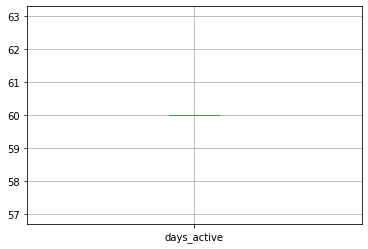

In [43]:
# Deal with datetimes to create new features
dfs['year_start'] = pd.to_datetime(dfs['start_time']).dt.year.astype('category')
dfs['month_start'] = pd.to_datetime(dfs['start_time']).dt.month.astype('category')
dfs['year_stop'] = pd.to_datetime(dfs['stop_time']).dt.year.astype('category')
dfs['month_stop'] = pd.to_datetime(dfs['stop_time']).dt.month.astype('category')
dfs['week_day'] = pd.to_datetime(dfs['stop_time']).dt.weekday.astype('category')
#dfs['days_active'] = (dfs['start_time'] - dfs['stop_time']).dt.days
dfs['days_active'] = [int(i.days) for i in (dfs.stop_time - dfs.start_time)]
dfs['days_active'] = dfs['days_active'].astype('int')
dfs = dfs.reset_index(drop=True)

#dfs = dfs.drop(['date_created', 'start_time', 'last_updated', 'stop_time'], axis=1)
boxplot = dfs.boxplot(column=['days_active'], showfliers=False)

# Model: Embeddings Encoding + Logistic Regression

In [44]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from embedding_encoder import EmbeddingEncoder
from embedding_encoder.utils.compose import ColumnTransformerWithNames

In [45]:
dfs.columns

Index(['title', 'condition', 'warranty', 'initial_quantity',
       'available_quantity', 'sold_quantity', 'buying_mode', 'base_price',
       'price', 'currency_id', 'seller_state', 'seller_city', 'Giro_postal',
       'free_shipping', 'local_pick_up', 'mode', 'Contra_reembolso',
       'Acordar_con_el_comprador', 'Cheque_certificado', 'Efectivo',
       'Transferencia_bancaria', 'Aceptan_Tarjeta', 'status',
       'automatic_relist', 'accepts_mercadopago', 'category_id', 'seller_id',
       'date_created', 'start_time', 'last_updated', 'stop_time', 'year_start',
       'month_start', 'year_stop', 'month_stop', 'week_day', 'days_active'],
      dtype='object')

In [46]:
dfs.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

Index(['initial_quantity', 'available_quantity', 'sold_quantity', 'base_price',
       'price', 'days_active'],
      dtype='object')

In [47]:
dfs.select_dtypes(include=['category']).columns

Index(['condition', 'buying_mode', 'currency_id', 'seller_state',
       'seller_city', 'mode', 'status', 'category_id', 'seller_id',
       'year_start', 'month_start', 'year_stop', 'month_stop', 'week_day'],
      dtype='object')

In [48]:
# Split train and test
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'category', 'bool']

X = dfs.select_dtypes(include=numerics).drop(columns=['condition'], axis=1)

dfs['condition'] = dfs['condition'].replace('new', 0)
dfs['condition'] = dfs['condition'].replace('used', 1)
y = dfs.condition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
%%time
categorical_high = ["seller_city", "category_id"] #"seller_id"
numeric = X.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns#.drop(columns=['condition'], axis=1)
categorical_low = ["buying_mode", "currency_id", "seller_state", "mode", "status", "week_day", "month_stop", "year_stop", "month_start", "year_start"] + list(X.select_dtypes(include=['bool']).columns)
#categorical_low = ["buying_mode", "currency_id", "seller_state", "mode", "status", "week_day", "month_stop", "month_start"] + list(X.select_dtypes(include=['bool']).columns)
#categorical_low = ["buying_mode", "currency_id", "seller_state", "mode", "status"] + list(X.select_dtypes(include=['bool']).columns)

def build_pipeline(mode: str):
    if mode == "embeddings":
        high_cardinality_encoder = EmbeddingEncoder(task="classification") #regression
    else:
        high_cardinality_encoder = OrdinalEncoder()
    one_hot_encoder = OneHotEncoder(handle_unknown="ignore")
    scaler = StandardScaler()
    imputer = ColumnTransformerWithNames([("numeric", SimpleImputer(strategy="mean"), numeric), ("categorical", SimpleImputer(strategy="most_frequent"), categorical_low+categorical_high)])
    processor = ColumnTransformer([("one_hot", one_hot_encoder, categorical_low), (mode, high_cardinality_encoder, categorical_high), ("scale", scaler, numeric)])
    return make_pipeline(imputer, processor, LogisticRegression(max_iter=1000)) #RandomForestRegressor() #XGBClassifier()

embeddings_pipeline = build_pipeline("embeddings")

embeddings_pipeline.fit(X_train, y_train)

2022-07-19 15:42:27.422940: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-19 15:42:27.423015: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-19 15:42:29.682006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-19 15:42:29.682030: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-19 15:42:29.682050: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (brspobitanl1727): /proc/driver/nvidia/version does not exist
2022-07-19 15:42:29.682301: I tensorflow/core/platform/cpu_fe

CPU times: user 5min 16s, sys: 1min 16s, total: 6min 32s
Wall time: 1min 12s


Pipeline(steps=[('columntransformerwithnames',
                 ColumnTransformerWithNames(transformers=[('numeric',
                                                           SimpleImputer(),
                                                           Index(['initial_quantity', 'available_quantity', 'sold_quantity', 'base_price',
       'price', 'days_active'],
      dtype='object')),
                                                          ('categorical',
                                                           SimpleImputer(strategy='most_frequent'),
                                                           ['buying_mode',
                                                            'currency_id',
                                                            'seller_state',
                                                            'mode', 'status',
                                                            'week...
                                                   'Transferencia

In [50]:
y_pred_proba = embeddings_pipeline.predict_proba(X_test) #.decision_function(X_test) 

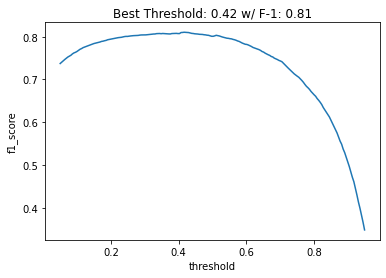

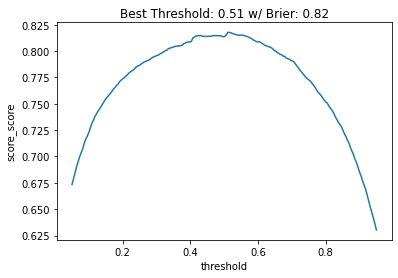

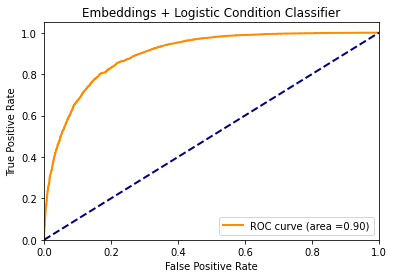

CPU times: user 2.02 s, sys: 1.08 s, total: 3.1 s
Wall time: 1.78 s


In [51]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score, brier_score_loss 
from sklearn.metrics import matthews_corrcoef, mean_squared_error, log_loss
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Plot F1-Score and Threshold
from sklearn.metrics import f1_score

threshold_list = np.linspace(0.05, 0.95, 200)

f1_list = []
for threshold in threshold_list:
    pred_label = np.where(y_pred_proba[:,1] < threshold, 0, 1)
    f1 = f1_score(y_test, pred_label)
    f1_list.append(f1)

df_f1 = pd.DataFrame({'threshold':threshold_list, 'f1_score': f1_list})
df_f1[df_f1['f1_score'] == max(df_f1['f1_score'])]
bt = df_f1[df_f1['f1_score'] == max(df_f1['f1_score'])]['threshold'].values[0]
f1 = df_f1[df_f1['f1_score'] == max(df_f1['f1_score'])]['f1_score'].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ F-1: " + str(round(f1, 2))
sns.lineplot(data=df_f1, x='threshold', y='f1_score').set_title(title)
plt.show()

# Plot your Score and threshold
threshold_list = np.linspace(0.05, 0.95, 200)

score_list = []
for threshold in threshold_list:
    pred_label = np.where(y_pred_proba[:,1] > threshold, 0, 1)
    score = brier_score_loss(y_test, pred_label)
    score_list.append(score)

df_score = pd.DataFrame({'threshold':threshold_list, 'score_score': score_list})
df_score[df_score['score_score'] == max(df_score['score_score'])]
bt = df_score[df_score['score_score'] == max(df_score['score_score'])]['threshold'].values[0]
score = df_score[df_score['score_score'] == max(df_score['score_score'])]['score_score'].values[0]
title = "Best Threshold: " + str(round(bt, 2)) + " w/ Brier: " + str(round(score, 2))
sns.lineplot(data=df_score, x='threshold', y='score_score').set_title(title)
plt.show()

from sklearn.metrics import roc_curve

#Plot ROC_Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc = roc_auc_score(y_test, y_pred_proba[:,1])
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label=f"ROC curve (area ={'%.2f' % roc})"# % roc_auc["micro"],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Embeddings + Logistic Condition Classifier")
plt.legend(loc="lower right")
plt.savefig('emb_logistic_roc_curve.png', bbox_inches='tight', dpi = 300)
plt.show()

In [52]:
# best_preds_score = np.where(preds_test < bt, 0, 1) # Uncomment if you want to change threshold... Lower, because threshold calculated on Brier Loss and lower is better

print("mean_squared_error_test = {}".format(mean_squared_error(y_test, y_pred_proba[:,1], squared=False)))
print("Roc_auc = {}".format(roc_auc_score(y_test, y_pred_proba[:,1])))
print("Brier_error = {}".format(brier_score_loss(y_test, y_pred_proba[:,1])))
print("Logloss_test = {}".format(log_loss(y_test, y_pred_proba[:,1])))
# print("Precision = {}".format(precision_score(Y_test, preds_test[:,1])))
# print("Recall = {}".format(recall_score(Y_test, preds_test[:,1])))
# print("F1 = {}".format(f1_score(Y_test, preds_test[:,1])))
# print("Kappa_score = {}".format(cohen_kappa_score(Y_test, preds_test[:,1])))
# print("Matthews_corrcoef = {}".format(matthews_corrcoef(Y_test, preds_test[:,1])))

mean_squared_error_test = 0.35980168642762755
Roc_auc = 0.8974319412958278
Brier_error = 0.12945725355616483
Logloss_test = 0.40655035006184204
